# Ejercicio 6.5 NLP 

### Importacion de librerias a utilizar

<b>Paso 0.</b> Instalacion de librerias de anaconda

conda install -c anaconda nltk

conda install -c conda-forge r-stopwords

pip install stop-words

conda install -c conda-forge textblob

<b>Paso 1.</b> Importacion de librerias

In [1]:
#Importacion de numpy
import numpy as np
#Importacion de pandas
import pandas as pd
#Importacion de pyplot
import matplotlib.pyplot as plt
#Importacion de seaborn
import seaborn as sns
#Importacion de nltk
import nltk 
nltk.download('stopwords')
#Importacion de stopwords
from nltk.corpus import stopwords
#Importacion de re para eliminar caracteres especiales
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ETL

<b>Paso 2.</b> Lectura del archivo de excel con los datos del empleado

In [2]:
#Load the dataset into a dataframe 
#Employeedf = pd.read_excel("../Datos/6.5. EmployeeData.xlsx", sheet_name='RapidMiner Data')
Employeedf = pd.read_excel("../01. Flat Files/6.5. EmployeeData.xlsx", sheet_name='RapidMiner Data')
Employeedf.head(3)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past


<b> Paso 3.</b> Revision de la cantidad de datos que se tienen del DF Employeedf

In [3]:
#Cuenta la cantidad de registros no nulos por columna
Employeedf.count()

CanDoBetter         1689
ID                  1715
Training            1715
Est_Income          1715
Benefit             1715
length_of_hire      1715
Facility            1715
DriveTime           1715
Marital             1715
SpousalBenefit      1715
StockPlan           1715
TrainingRecieved    1715
PositionType        1715
Education           1715
Status              1715
dtype: int64

<b>Paso 4.</b> Se realiza la limpieza para las columnas necesarias

In [4]:
#Limpiamos filas en blanco
Employeedf = Employeedf.dropna(subset=['ID'])

#Normalizamos CanDoBetter con "nothing"
Employeedf["CanDoBetter"].fillna("nothing", inplace = True) 

#Cuenta la cantidad de registros no nulos por columna
Employeedf.count()

CanDoBetter         1715
ID                  1715
Training            1715
Est_Income          1715
Benefit             1715
length_of_hire      1715
Facility            1715
DriveTime           1715
Marital             1715
SpousalBenefit      1715
StockPlan           1715
TrainingRecieved    1715
PositionType        1715
Education           1715
Status              1715
dtype: int64

## Modelo 1 - NLTK

<b>Paso 5.</b> Se tokenizan las palabras de la columna CanDoBetter

In [5]:
#Tokenizamos las palabras --> la palabras se vuelven un vector todas en minuscula
text = Employeedf["CanDoBetter"].to_string(index=False).lower()

#Imprime el arreglo de text
#print(text)     

#Se realiza un arreglo con cada una de las palabras que tiene el campo ConDoBetter
tokens = [t for t in text.split()]

#Se imprime el arreglo tokens
#print(tokens)

#Removemos caracteres especiales
tokens = [re.sub('[^a-zA-Z0-9\s-]+', '',_) for _ in tokens]

#Arreglo que representa las palabras  las palabras neutras
clean_tokens = tokens[:]

#Se obtine un arreglo de palabras neutras en ingles
sr = stopwords.words('english')

for token in tokens:
    
    #Si la palabra esta en el diccionario de stopwords
    if token in sr:
        clean_tokens.remove(token)
    
    #Si la palabra es nothing se elimina
    if token in ["nothing",""]:
        clean_tokens.remove(token)
        
    #Si el token es un numero 1
    if len(token) in ["1"]:
        clean_tokens.remove(token)

#Contamos frecuencia de palabras
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

better:116
non-monetary:1
benefits:25
company:37
outings:13
safety:1
meeting:2
discussing:1
wha:1
careerpromotions:122
dont:16
want:2
answer:5
board:2
members:1
listen:67
pay:243
even:5
new:4
employee:23
starts:1
recognize:15
good:26
works:8
boot:1
planning:1
retire:1
day:2
c:4
treat:27
employees:79
respect:20
higher:15
wage:4
pension:186
know:16
401k:15
raise:21
industry:7
standard:7
im:4
satisfied:2
sponsored:7
after-work:6
eve:5
incentives:25
could:14
communicate:4
let:2
us:12
reward:12
benefit:21
allow:4
advancement:3
take:38
action:35
practice:1
preach:1
hold:1
th:3
nc:1
raised:1
social:97
events:100
focused:1
performance:12
across:2
busi:1
need:7
training:6
up-to-date:1
skills:2
periodic:1
extra:1
offer:27
fair:3
compensation:16
like:9
many:4
ot:1
vacation:22
time:29
would:9
change:2
one:3
w:4
retirement:3
fund:1
make:11
perks:8
appealing:3
stop:8
rewarding:1
give:14
credit:1
childcare:9
support:8
rollover:15
wages:2
cost:3
living:2
raises:11
insurance:7
appre:1
perk:12
quit:1
pr

<b>Paso 6.</b> Se presenta un grafico y se exportan las palabras

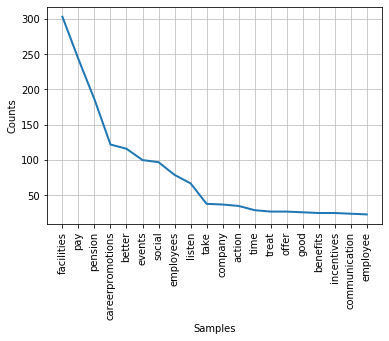

,Term,Frequency
0,better,116
1,non-monetary,1
2,benefits,25


In [6]:
#Se hace el plot de las frecuencias de las palabras
freq.plot(20,cumulative=False)

#Se convierte en DF el arreglo de palabras
df_fdist = pd.DataFrame.from_dict(freq, orient='index').reset_index()

#Se cambia el nombre de las columnas
df_fdist.columns = ['Term','Frequency']

#Se exporta a un CSV
df_fdist.to_csv("../01. Flat Files/Palabras_token.csv",index = False)
#df_fdist.to_csv("../Datos/Palabras_token.csv")

#Se muestra el DF
df_fdist.head(3)

<b>Paso 7.</b> Aunque ya se eliminaron ciertas palabras comunes se exploro el CSV y se encontraron otras que se podian elimninar dado que no aportan informacion, estas palabras se van a almacenar en un nuevo CSV con nombre <i>"Ejercicio 6.5 - Token Eliminar.csv"</i>

In [7]:
#Se carga el DF de los Token que se deben eliminar
#tokenDelete = pd.read_csv("../Datos/Ejercicio 6.5 - Token Eliminar.csv")
tokenDelete = pd.read_csv("../01. Flat Files/Ejercicio 6.5 - Token Eliminar.csv")

#Se crea el arreglo final de tokens
df_fdistFinal = df_fdist.merge(tokenDelete,left_on='Term',right_on='TermDelete',how='left')

#Se actualiza el DF final
df_fdistFinal = df_fdistFinal[df_fdistFinal["TermDelete"].isnull() == True].drop("TermDelete",axis=1)

#Se reinicia el indice
df_fdistFinal = df_fdistFinal.reset_index().drop("index",axis=1)

<b>Paso 8.</b> Se actualiza el valor que tiene de peso cada palabra --> Paso de valores String a un valor numerico

In [8]:
#El total de palabras que hay en el campo CanDoBetter
totalPalabras = df_fdistFinal["Frequency"].sum()

#Peso de cada palabra dentro del modelo
df_fdistFinal["Peso"] = df_fdistFinal["Frequency"]/totalPalabras

#Se muestra el DF
df_fdistFinal.head(3)

,Term,Frequency,Peso
0,better,116,0.036767
1,non-monetary,1,0.000317
2,benefits,25,0.007924


<b>Paso 9.</b> Funcion que se encarga de determinar el peso ponderado que tiene la frase del campo <i>"CanDoBetter"</i>, con el fin de que la cantidad de palabras no afecten el modelo

In [9]:
def pesoPonderado(comparar):
    
    #Suma de los pesos por el total de tokens
    peso = 0.0
    
    #Cantidad de tokens en la frase
    cantidad = 0
    
    #Ponderacion del valor de la frase
    ponderacion = 0
    
    for i in range(df_fdistFinal.shape[0]):
        
        #Se valida si el token esta en la frase
        if df_fdistFinal.loc[i][0] in comparar:
            
            #Se actualiza el valor del peso
            peso = peso + df_fdistFinal.loc[i][2]
            
            #Se actualiza la cantidad de tokens
            cantidad = cantidad + 1
    
    #Se prueba si se puede dividir
    try:
        
        ponderacion = peso/cantidad
    
    #En caso de error
    except Exception:
        
        ponderacion = 0
    
    #Se retorna el valor de la ponderacion
    return ponderacion

<b>Paso 10.</b> Se actualiza el valor del peso ponderado para la frase del campo <i>"CanDoBetter"</i>

In [10]:
#Se reinicia el indice del DF de Employee
Employeedf = Employeedf.reset_index().drop("index",axis=1)

for i in range(Employeedf.shape[0]):
    
    #Se obtiene el valor del peso ponderado
    pesoPond = pesoPonderado(Employeedf.loc[i]["CanDoBetter"])
    
    #Se actualiza el valor del peso ponderado para el registro
    Employeedf.loc[i,"pesoPonderado"] = pesoPond

#Se muestra el DF
Employeedf.head(3)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status,pesoPonderado
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current,0.007516
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current,0.004675
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past,0.003150


<b>Paso 11.</b> Se codifican las columnas con valores texto

In [11]:
#Importa la libreria LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Se inicializa el LabelEncoder
enc = LabelEncoder()

#Se crea un diccionario para las transformaciones
diccionarioEncoder = {}

#Se realiza la codificacion
enc.fit(Employeedf["Training"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Training':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Training"] = enc.transform(Employeedf["Training"])

#Se realiza la codificacion
enc.fit(Employeedf["Benefit"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Benefit':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Benefit"] = enc.transform(Employeedf["Benefit"])

#Se realiza la codificacion
enc.fit(Employeedf["Facility"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Facility':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Facility"] = enc.transform(Employeedf["Facility"])

#Se realiza la codificacion
enc.fit(Employeedf["DriveTime"])
#Obtencion de la codificacion
diccionarioEncoder.update({'DriveTime':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["DriveTime"] = enc.transform(Employeedf["DriveTime"])

#Se realiza la codificacion
enc.fit(Employeedf["Marital"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Marital':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Marital"] = enc.transform(Employeedf["Marital"])

#Se realiza la codificacion
enc.fit(Employeedf["SpousalBenefit"])
#Obtencion de la codificacion
diccionarioEncoder.update({'SpousalBenefit':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["SpousalBenefit"] = enc.transform(Employeedf["SpousalBenefit"])

#Se realiza la codificacion
enc.fit(Employeedf["StockPlan"])
#Obtencion de la codificacion
diccionarioEncoder.update({'StockPlan':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["StockPlan"] = enc.transform(Employeedf["StockPlan"])

#Se realiza la codificacion
enc.fit(Employeedf["TrainingRecieved"])
#Obtencion de la codificacion
diccionarioEncoder.update({'TrainingRecieved':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["TrainingRecieved"] = enc.transform(Employeedf["TrainingRecieved"])

#Se realiza la codificacion
enc.fit(Employeedf["PositionType"])
#Obtencion de la codificacion
diccionarioEncoder.update({'PositionType':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["PositionType"] = enc.transform(Employeedf["PositionType"])

#Se realiza la codificacion
enc.fit(Employeedf["Education"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Education':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Education"] = enc.transform(Employeedf["Education"])

#Se realiza la codificacion
enc.fit(Employeedf["Status"])
#Obtencion de la codificacion
diccionarioEncoder.update({'Status':enc.classes_})
#Se realiza la actulizacion del campo
Employeedf["Status"] = enc.transform(Employeedf["Status"])

#Se muestra el diccionario
diccionarioEncoder

{'Training': array(['N', 'Y'], dtype=object),
 'Benefit': array(['N', 'Y'], dtype=object),
 'Facility': array(['Facility A', 'Facility B', 'Facility C'], dtype=object),
 'DriveTime': array(['0-30 mnts', '30-60 mnts', '60-90 mnts', 'More than 90 mnts'],
       dtype=object),
 'Marital': array(['Married', 'Single', 'Status Unknown',
        'Widowed/Separated/Divorced'], dtype=object),
 'SpousalBenefit': array(['No', 'Yes'], dtype=object),
 'StockPlan': array(['No', 'Yes'], dtype=object),
 'TrainingRecieved': array(['No', 'Yes'], dtype=object),
 'PositionType': array(['Clerical Staff/Office Services', 'Executive Management',
        'Non-Managerial/ Professional', 'Sales', 'Supervisor / Lead Tech.'],
       dtype=object),
 'Education': array(['Associate, High school, or Certification',
        'Baccalaureate or 4 year college degree',
        'Doctorate (PhD, EdD, etc)', 'Masters Degree'], dtype=object),
 'Status': array(['Current', 'Past'], dtype=object)}

<b>Paso 12.</b> Separacion las variables

In [12]:
# Se deja una matriz con las columnas predictorias
X = Employeedf.drop(columns=["CanDoBetter","ID","Status"])
# Un arreglo con la columna predecida
Y = Employeedf["Status"]

<b>Paso 13.</b> Se realiza la separacion de los datos de testeo y entrenamiento

In [13]:
#Importa la funcion train test split
from sklearn.model_selection import train_test_split

#Se obtienen los valores de entrenamiento y testeo
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size = 0.3,random_state = 101)

print("Matriz XTrain = ",XTrain.shape)
print("Matriz XTest = ",XTest.shape)
print("Matriz YTrain = ",YTrain.shape)
print("Matriz YTest = ",YTest.shape)

Matriz XTrain =  (1200, 13)
Matriz XTest =  (515, 13)
Matriz YTrain =  (1200,)
Matriz YTest =  (515,)


<b>Paso 14.</b> Modelo Naive Bayes - Entrenamiento

In [14]:
#Importa el el modelo de Naive Bayes
from sklearn.naive_bayes import CategoricalNB

#Se realiza el entrenamiento del model
naiveBayes = CategoricalNB()
naiveBayes.fit(XTrain,YTrain)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

<b>Paso 15.</b> Modelo Naive Bayes - Reporte de Clasificacion

In [15]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = naiveBayes.predict(XTest)

#Reporte de clasificacion
resultadoNB = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoNB = resultadoNB.rename(columns={'0':'Current','1':'Past'})
resultadoNB

,Current,Past,accuracy,macro avg,weighted avg
precision,0.777108,0.825137,0.794175,0.801123,0.798092
recall,0.889655,0.671111,0.794175,0.780383,0.794175
f1-score,0.829582,0.740196,0.794175,0.784889,0.790530
support,290.000000,225.000000,0.794175,515.000000,515.000000


<b>Paso 16.</b> Modelo Naive Bayes - Matriz de Confusión

In [2]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="Blues" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

NameError: name 'YTest' is not defined

<b>Paso 17.</b> Modelo Arbol de desicion - Entrenamiento

In [17]:
#Importa el el modelo de Arbol de Desicion
from sklearn.tree import DecisionTreeClassifier

#Se realiza el entrenamiento del model
arbol = DecisionTreeClassifier()
arbol.fit(XTrain,YTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Paso 18.</b> Modelo Arbol de desicion - Reporte de Clasificacion

In [18]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = arbol.predict(XTest)

#Reporte de clasificacion
resultadoA = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoA = resultadoA.rename(columns={'0':'Current','1':'Past'})
resultadoA

,Current,Past,accuracy,macro avg,weighted avg
precision,0.827119,0.790909,0.81165,0.809014,0.811299
recall,0.841379,0.773333,0.81165,0.807356,0.811650
f1-score,0.834188,0.782022,0.81165,0.808105,0.811397
support,290.000000,225.000000,0.81165,515.000000,515.000000


<b>Paso 19.</b> Modelo Arbol de desicion - Matriz de confusion

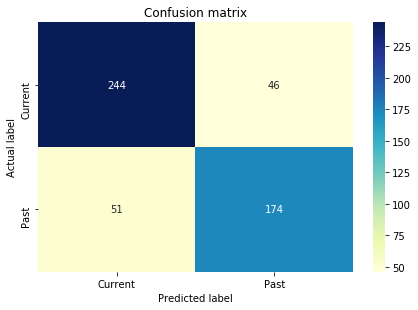

In [19]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 20.</b> Modelo Knn - Entrenamiento

In [20]:
#Importa el el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

#Se realiza el entrenamiento del model
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

<b>Paso 21.</b> Modelo Knn - Reporte Clasificacion

In [21]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = knn.predict(XTest)

#Reporte de clasificacion
resultadoKnn = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoKnn = resultadoKnn.rename(columns={'0':'Current','1':'Past'})
resultadoKnn

,Current,Past,accuracy,macro avg,weighted avg
precision,0.676471,0.737589,0.693204,0.707030,0.703173
recall,0.872414,0.462222,0.693204,0.667318,0.693204
f1-score,0.762048,0.568306,0.693204,0.665177,0.677404
support,290.000000,225.000000,0.693204,515.000000,515.000000


<b>Paso 22.</b> Modelo Knn - Matriz de Confusion

In [1]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

NameError: name 'YTest' is not defined

<b>Paso 23.</b> Comparacion de resultados de los modelos

In [23]:
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB.loc["precision"]["accuracy"])
print(resultadoNB.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA.loc["precision"]["accuracy"])
print(resultadoA.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn.loc["precision"]["accuracy"])
print(resultadoKnn.loc["precision":"recall","Current":"Past"])

Resultado Naive Bayes Total Accuracy =  0.7941747572815534
            Current      Past
precision  0.777108  0.825137
recall     0.889655  0.671111

Resultado Arbol de Desicion Total Accuracy =  0.8116504854368932
            Current      Past
precision  0.827119  0.790909
recall     0.841379  0.773333

Resultado Knn Total Accuracy =  0.6932038834951456
            Current      Past
precision  0.676471  0.737589
recall     0.872414  0.462222


Dado que nuestra variable de prediccion es si un empleado se ha marchado el modelo seleccionado sera el Arbol de Desicion dado que tiene una mayor presicion sobre la clase Past (Empleado que se ha marchado)

## Modelo 2 - TextBlob

<b>Paso 24.</b> Se agregan las columnas de polaridad y subjetividad de la columna <i>"CanDoBetter"</i>

In [24]:
#Se importa la librera TextBlod
from textblob import TextBlob

#Funcion para calcular la polaridad del texto
pol = lambda x: TextBlob(x).sentiment.polarity

#Funcion para calcular la subjetividad del texto
sub = lambda x: TextBlob(x).sentiment.subjectivity

#Se actualiza los valores de polaridad
Employeedf['polarity'] = Employeedf['CanDoBetter'].apply(pol)

#Se actualiza los valores de subjetividad
Employeedf['subjectivity'] = Employeedf['CanDoBetter'].apply(sub)

Employeedf.head(3)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status,pesoPonderado,polarity,subjectivity
0,better non-monetary benefits.,2181.0,1,60095.20000,1,58.479532,0,3,0,1,1,0,3,0,0,0.007516,0.50,0.5
1,company outings,2829.0,1,47049.07979,0,35.714286,1,0,0,1,0,1,3,0,0,0.004675,0.00,0.0
2,"Having more safety meeting, and discussing wha...",2144.0,1,60724.12250,1,17.152659,1,2,0,1,1,1,3,3,1,0.003150,0.25,0.5


<b>Paso 25.</b> Se realiza la separacion de variables

In [25]:
# Se deja una matriz con las columnas predictorias
X = Employeedf.drop(columns=["CanDoBetter","ID","Status","pesoPonderado"])
# Un arreglo con la columna predecida
Y = Employeedf["Status"]

<b>Paso 26.</b> Separacion de los datos de entrenamiento y testeo

In [26]:
#Importa la funcion train test split
from sklearn.model_selection import train_test_split

#Se obtienen los valores de entrenamiento y testeo
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size = 0.3,random_state = 101)

print("Matriz XTrain = ",XTrain.shape)
print("Matriz XTest = ",XTest.shape)
print("Matriz YTrain = ",YTrain.shape)
print("Matriz YTest = ",YTest.shape)

Matriz XTrain =  (1200, 14)
Matriz XTest =  (515, 14)
Matriz YTrain =  (1200,)
Matriz YTest =  (515,)


<b>Paso 27.</b> Naive Bayes - Entrenamiento

In [27]:
#Se importa la ejecucion secuencial 
from sklearn.pipeline import Pipeline
#Funcion para la normalizacion de variables
from sklearn.preprocessing import MinMaxScaler
#Importa el el modelo de Naive Bayes
from sklearn.naive_bayes import CategoricalNB

#Se realiza el entrenamiento del model
naiveBayes2 = Pipeline([("normalizacion",MinMaxScaler()),("modelo",CategoricalNB())])
naiveBayes2.fit(XTrain,YTrain)

Pipeline(memory=None,
         steps=[('normalizacion',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('modelo',
                 CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

<b>Paso 28.</b> Naive Bayes - Reporte Clasificacion

In [28]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = naiveBayes2.predict(XTest)

#Reporte de clasificacion
resultadoNB2 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoNB2 = resultadoNB2.rename(columns={'0':'Current','1':'Past'})
resultadoNB2

,Current,Past,accuracy,macro avg,weighted avg
precision,0.629630,0.579268,0.613592,0.604449,0.607627
recall,0.762069,0.422222,0.613592,0.592146,0.613592
f1-score,0.689548,0.488432,0.613592,0.588990,0.601681
support,290.000000,225.000000,0.613592,515.000000,515.000000


<b>Paso 29.</b> Naive Bayes - Matriz de Confusion

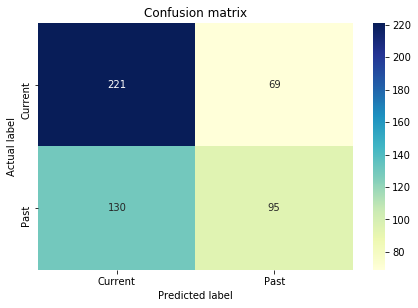

In [29]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 30.</b> Arbol de Desicion - Entrenamiento

In [30]:
#Importa el el modelo de Arbol de Desicion
from sklearn.tree import DecisionTreeClassifier

#Se realiza el entrenamiento del model
arbol2 = DecisionTreeClassifier()
arbol2.fit(XTrain,YTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Paso 31.</b> Arbol de Desicion - Reporte Clasificiacion

In [31]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = arbol2.predict(XTest)

#Reporte de clasificacion
resultadoA2 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoA2 = resultadoA2.rename(columns={'0':'Current','1':'Past'})
resultadoA2

,Current,Past,accuracy,macro avg,weighted avg
precision,0.811688,0.806763,0.809709,0.809226,0.809537
recall,0.862069,0.742222,0.809709,0.802146,0.809709
f1-score,0.836120,0.773148,0.809709,0.804634,0.808608
support,290.000000,225.000000,0.809709,515.000000,515.000000


<b>Paso 32.</b> Arbol de Desicion - Matriz de Confusion

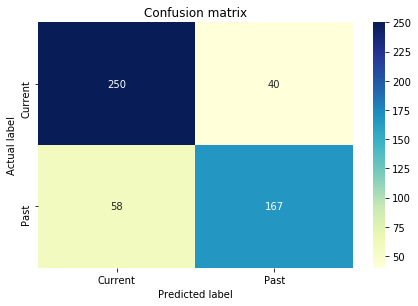

In [32]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 33.</b> Knn - Entrenamiento

In [33]:
#Importa el el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

#Se realiza el entrenamiento del model
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

<b>Paso 34.</b> Knn - Reporte Clasificacion

In [34]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = knn2.predict(XTest)

#Reporte de clasificacion
resultadoKnn2 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoKnn2 = resultadoKnn2.rename(columns={'0':'Current','1':'Past'})
resultadoKnn2

,Current,Past,accuracy,macro avg,weighted avg
precision,0.679144,0.744681,0.697087,0.711913,0.707777
recall,0.875862,0.466667,0.697087,0.671264,0.697087
f1-score,0.765060,0.573770,0.697087,0.669415,0.681487
support,290.000000,225.000000,0.697087,515.000000,515.000000


<b>Paso 35.</b> Knn - Matriz de Confusion

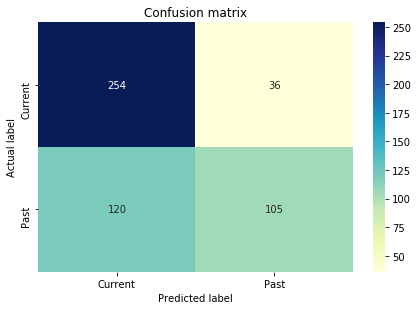

In [35]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 36.</b> Comparacion de resultados de modelos

In [36]:
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB2.loc["precision"]["accuracy"])
print(resultadoNB2.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA2.loc["precision"]["accuracy"])
print(resultadoA2.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn2.loc["precision"]["accuracy"])
print(resultadoKnn2.loc["precision":"recall","Current":"Past"])

Resultado Naive Bayes Total Accuracy =  0.6135922330097088
            Current      Past
precision  0.629630  0.579268
recall     0.762069  0.422222

Resultado Arbol de Desicion Total Accuracy =  0.8097087378640777
            Current      Past
precision  0.811688  0.806763
recall     0.862069  0.742222

Resultado Knn Total Accuracy =  0.6970873786407767
            Current      Past
precision  0.679144  0.744681
recall     0.875862  0.466667


## Modelo 3 - NLTK y TextBlob

<b>Paso 37.</b> Se realiza la separacion de variables

In [37]:
# Se deja una matriz con las columnas predictorias
X = Employeedf.drop(columns=["CanDoBetter","ID","Status"])
# Un arreglo con la columna predecida
Y = Employeedf["Status"]

<b>Paso 38.</b> Separacion de los datos de entrenamiento y testeo

In [38]:
#Importa la funcion train test split
from sklearn.model_selection import train_test_split

#Se obtienen los valores de entrenamiento y testeo
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size = 0.3,random_state = 101)

print("Matriz XTrain = ",XTrain.shape)
print("Matriz XTest = ",XTest.shape)
print("Matriz YTrain = ",YTrain.shape)
print("Matriz YTest = ",YTest.shape)

Matriz XTrain =  (1200, 15)
Matriz XTest =  (515, 15)
Matriz YTrain =  (1200,)
Matriz YTest =  (515,)


<b>Paso 39.</b> Naive Bayes - Entrenamiento

In [39]:
#Se importa la ejecucion secuencial 
from sklearn.pipeline import Pipeline
#Funcion para la normalizacion de variables
from sklearn.preprocessing import MinMaxScaler
#Importa el el modelo de Naive Bayes
from sklearn.naive_bayes import CategoricalNB

#Se realiza el entrenamiento del model
naiveBayes3 = Pipeline([("normalizacion",MinMaxScaler()),("modelo",CategoricalNB())])
naiveBayes3.fit(XTrain,YTrain)

Pipeline(memory=None,
         steps=[('normalizacion',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('modelo',
                 CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

<b>Paso 40.</b> Naive Bayes - Reporte Clasificacion

In [40]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = naiveBayes3.predict(XTest)

#Reporte de clasificacion
resultadoNB3 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoNB3 = resultadoNB3.rename(columns={'0':'Current','1':'Past'})
resultadoNB3

,Current,Past,accuracy,macro avg,weighted avg
precision,0.697674,0.843750,0.733981,0.770712,0.761494
recall,0.931034,0.480000,0.733981,0.705517,0.733981
f1-score,0.797637,0.611898,0.733981,0.704767,0.716489
support,290.000000,225.000000,0.733981,515.000000,515.000000


<b>Paso 41.</b> Naive Bayes - Matriz de Confusion

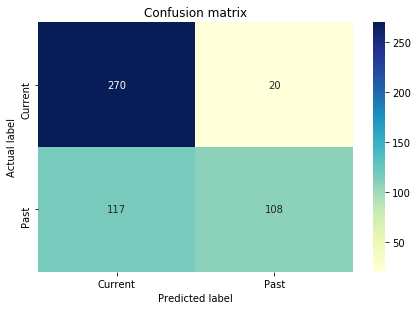

In [41]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 42.</b> Arbol de Desicion - Entrenamiento

In [42]:
#Importa el el modelo de Arbol de Desicion
from sklearn.tree import DecisionTreeClassifier

#Se realiza el entrenamiento del model
arbol3 = DecisionTreeClassifier()
arbol3.fit(XTrain,YTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<b>Paso 42.</b> Arbol de Desicion - Reporte Clasificiacion

In [43]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = arbol3.predict(XTest)

#Reporte de clasificacion
resultadoA3 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoA3 = resultadoA3.rename(columns={'0':'Current','1':'Past'})
resultadoA3

,Current,Past,accuracy,macro avg,weighted avg
precision,0.800664,0.771028,0.78835,0.785846,0.787717
recall,0.831034,0.733333,0.78835,0.782184,0.788350
f1-score,0.815567,0.751708,0.78835,0.783638,0.787668
support,290.000000,225.000000,0.78835,515.000000,515.000000


<b>Paso 43.</b> Arbol de Desicion - Matriz de Confusion

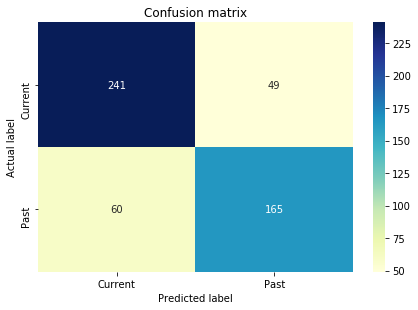

In [44]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 44.</b> Knn - Entrenamiento

In [45]:
#Importa el el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier

#Se realiza el entrenamiento del model
knn3 = KNeighborsClassifier(n_neighbors=2)
knn3.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

<b>Paso 45.</b> Knn - Reporte Clasificacion

In [46]:
#Se importa el reporte de clasificacion
from sklearn.metrics import classification_report

#Se predice con los datos de testo
YTestPredict = knn3.predict(XTest)

#Reporte de clasificacion
resultadoKnn3 = pd.DataFrame.from_dict(classification_report(YTest,YTestPredict,output_dict=True))
resultadoKnn3 = resultadoKnn3.rename(columns={'0':'Current','1':'Past'})
resultadoKnn3

,Current,Past,accuracy,macro avg,weighted avg
precision,0.679144,0.744681,0.697087,0.711913,0.707777
recall,0.875862,0.466667,0.697087,0.671264,0.697087
f1-score,0.765060,0.573770,0.697087,0.669415,0.681487
support,290.000000,225.000000,0.697087,515.000000,515.000000


<b>Paso 46.</b> Knn - Matriz de Confusion

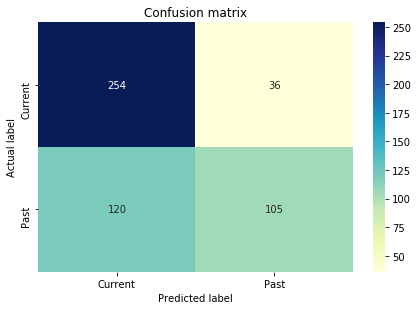

In [47]:
#Se importa la matriz de confusion
from sklearn.metrics import confusion_matrix

#Se ejecuta la matriz de confusion 
matrixConfusion = confusion_matrix(YTest, YTestPredict)

#Se pinta la matriz de confusion
sns.heatmap(matrixConfusion, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.yticks(np.arange(len(diccionarioEncoder["Status"]))+0.5,diccionarioEncoder["Status"])
plt.show()

<b>Paso 47.</b> Comparacion de resultados de modelos

In [48]:
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB3.loc["precision"]["accuracy"])
print(resultadoNB3.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA3.loc["precision"]["accuracy"])
print(resultadoA3.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn3.loc["precision"]["accuracy"])
print(resultadoKnn3.loc["precision":"recall","Current":"Past"])

Resultado Naive Bayes Total Accuracy =  0.7339805825242719
            Current     Past
precision  0.697674  0.84375
recall     0.931034  0.48000

Resultado Arbol de Desicion Total Accuracy =  0.7883495145631068
            Current      Past
precision  0.800664  0.771028
recall     0.831034  0.733333

Resultado Knn Total Accuracy =  0.6970873786407767
            Current      Past
precision  0.679144  0.744681
recall     0.875862  0.466667


## Comparacion todos los modelos

In [49]:
print("NLTK")
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB.loc["precision"]["accuracy"])
print(resultadoNB.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA.loc["precision"]["accuracy"])
print(resultadoA.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn.loc["precision"]["accuracy"])
print(resultadoKnn.loc["precision":"recall","Current":"Past"])

print("")

print("TextBlob")
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB2.loc["precision"]["accuracy"])
print(resultadoNB2.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA2.loc["precision"]["accuracy"])
print(resultadoA2.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn2.loc["precision"]["accuracy"])
print(resultadoKnn2.loc["precision":"recall","Current":"Past"])

print("")

print("NLTK y TextBlob")
print("Resultado Naive Bayes Total Accuracy = ",resultadoNB3.loc["precision"]["accuracy"])
print(resultadoNB3.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Arbol de Desicion Total Accuracy = ",resultadoA3.loc["precision"]["accuracy"])
print(resultadoA3.loc["precision":"recall","Current":"Past"])
print("")
print("Resultado Knn Total Accuracy = ",resultadoKnn3.loc["precision"]["accuracy"])
print(resultadoKnn3.loc["precision":"recall","Current":"Past"])

NLTK
Resultado Naive Bayes Total Accuracy =  0.7941747572815534
            Current      Past
precision  0.777108  0.825137
recall     0.889655  0.671111

Resultado Arbol de Desicion Total Accuracy =  0.8116504854368932
            Current      Past
precision  0.827119  0.790909
recall     0.841379  0.773333

Resultado Knn Total Accuracy =  0.6932038834951456
            Current      Past
precision  0.676471  0.737589
recall     0.872414  0.462222

TextBlob
Resultado Naive Bayes Total Accuracy =  0.6135922330097088
            Current      Past
precision  0.629630  0.579268
recall     0.762069  0.422222

Resultado Arbol de Desicion Total Accuracy =  0.8097087378640777
            Current      Past
precision  0.811688  0.806763
recall     0.862069  0.742222

Resultado Knn Total Accuracy =  0.6970873786407767
            Current      Past
precision  0.679144  0.744681
recall     0.875862  0.466667

NLTK y TextBlob
Resultado Naive Bayes Total Accuracy =  0.7339805825242719
            Cur